In [258]:
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [259]:
IMAGE_SIZE = [224, 224]

train_data_path = 'assets/train'
test_data_path = 'assets/test'

In [260]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')

In [261]:
resnet.summary()

n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0] 

In [262]:
for layer in resnet.layers:
  layer.trainable = False

In [263]:
folders = glob('assets/train/*')
print(folders)

['assets/train/lamborghini', 'assets/train/audi', 'assets/train/mercedes']


In [264]:
x = Flatten()(resnet.output)

In [265]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [266]:
model.summary()

0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [267]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [268]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [269]:
training_set = training_gen.flow_from_directory('assets/train', class_mode='categorical', target_size=(224, 224), batch_size=32)

test_set = test_gen.flow_from_directory('assets/test', class_mode='categorical', target_size=(224, 224), batch_size=32)

Found 57 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


In [270]:
result = model.fit_generator(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/50
2/2 [==============================] - 4s 2s/step - loss: 3.4527 - accuracy: 0.4211 - val_loss: 9.4418 - val_accuracy: 0.3455
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 12.3190 - accuracy: 0.2807 - val_loss: 8.4620 - val_accuracy: 0.3455
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 6.4833 - accuracy: 0.3860 - val_loss: 2.9804 - val_accuracy: 0.3091
Epoch 4/50
2/2 [==============================] - 4s 2s/step - loss: 3.8222 - accuracy: 0.3509 - val_loss: 4.8777 - val_accuracy: 0.3818
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 4.6796 - accuracy: 0.4035 - val_loss: 4.5119 - val_accuracy: 0.3455
Epoch 6/50
2/2 [==============================] - 3s 2s/step - loss: 3.0091 - accuracy: 0.5263 - val_loss: 1.5758 - val_accuracy: 0.4182
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 2.7676 - accuracy: 0.3333 - val_loss: 4.5274 - val_accuracy: 0.3455
Epoch 8/50
2/2 [========================

In [271]:
result.history

{'loss': [3.452716588973999,
  12.318950653076172,
  6.483342170715332,
  3.822218418121338,
  4.679636001586914,
  3.0090510845184326,
  2.7676382064819336,
  2.813725471496582,
  1.83269464969635,
  2.8268678188323975,
  1.6517002582550049,
  1.3878310918807983,
  1.3329764604568481,
  1.0469019412994385,
  1.2557932138442993,
  0.511120617389679,
  0.9037163853645325,
  0.5461005568504333,
  0.7931159734725952,
  0.5718918442726135,
  0.5812088847160339,
  0.5812867283821106,
  0.5378914475440979,
  0.5012982487678528,
  0.4526444673538208,
  0.3737424910068512,
  0.3559781312942505,
  0.3157026767730713,
  0.4414137899875641,
  0.3081319332122803,
  0.3442172408103943,
  0.2891027331352234,
  0.28392401337623596,
  0.32521283626556396,
  0.28317898511886597,
  0.24318866431713104,
  0.26934653520584106,
  0.2907957136631012,
  0.3027028441429138,
  0.24758701026439667,
  0.28163328766822815,
  0.27814680337905884,
  0.228914275765419,
  0.28946632146835327,
  0.23068828880786896,
 

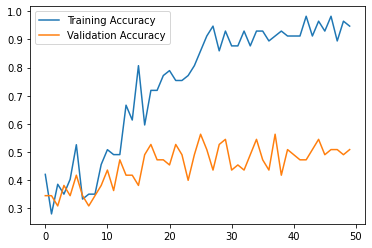

In [272]:
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

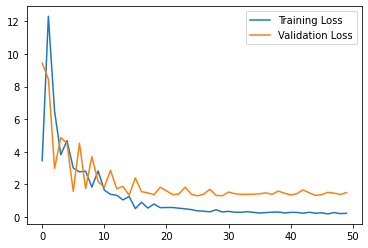

In [273]:
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [274]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [275]:
predictions = model.predict(test_set)

print(predictions)

[[2.98097488e-02 2.77378887e-01 6.92811310e-01]
 [7.99512267e-02 6.16714649e-04 9.19432104e-01]
 [7.63905514e-03 2.53170449e-02 9.67043936e-01]
 [3.53401483e-05 3.64018400e-04 9.99600708e-01]
 [1.97921582e-02 7.79412031e-01 2.00795829e-01]
 [2.33846772e-02 4.29992974e-01 5.46622336e-01]
 [8.74689966e-02 3.64202946e-01 5.48328102e-01]
 [7.15205312e-01 2.81482637e-01 3.31203570e-03]
 [2.61582714e-02 1.97843552e-01 7.75998116e-01]
 [2.23836768e-02 4.15440768e-01 5.62175512e-01]
 [3.52082849e-01 3.52380127e-01 2.95536935e-01]
 [2.15672459e-02 5.96093655e-01 3.82339090e-01]
 [9.53032792e-01 2.60678250e-02 2.08994150e-02]
 [7.60683954e-01 2.16089468e-02 2.17707142e-01]
 [2.83722393e-02 4.77950156e-01 4.93677646e-01]
 [1.04301386e-01 6.23625994e-01 2.72072673e-01]
 [9.95567665e-02 5.06095827e-01 3.94347459e-01]
 [1.09611182e-02 2.14488894e-01 7.74550021e-01]
 [1.04180396e-01 2.57350266e-01 6.38469338e-01]
 [1.82658732e-05 4.22365731e-03 9.95758116e-01]
 [1.26908168e-01 1.89562500e-01 6.835293

In [276]:
y_pred = np.argmax(predictions, axis=1)
print(y_pred)

[2 2 2 2 1 2 2 0 2 2 1 1 0 0 2 1 1 2 2 2 2 2 0 2 2 1 2 2 2 0 1 1 1 1 2 2 1
 2 1 0 2 2 0 1 2 2 1 1 2 2 2 2 1 1 2]


In [317]:
### EXAMPLE

In [318]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

model = load_model('model_resnet50.h5')

In [319]:
img = image.load_img('assets/test/mercedes/36.jpg', target_size=(224, 224))
# img.show()

In [320]:
x = image.img_to_array(img)

In [321]:
x.shape

(224, 224, 3)

In [322]:
x = x/255

In [323]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [324]:
prediction = model.predict(img_data)
prediction

array([[0.47150534, 0.5217471 , 0.00674752]], dtype=float32)

In [325]:
ans = np.argmax(prediction, axis=1)

In [326]:
if ans == 0:
    print("Audi")
elif ans == 1:
    print("Lamborghini")
elif ans == 2:
    print("Mercedes")

Lamborghini
